covid_19_india.csv file has COVID-19 cases at daily level  

StatewiseTestingDetails.csv file has Statewise testing details 

Importing necessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the StatewiseTestingDetails.csv dataset

In [61]:
df_test=pd.read_csv("StatewiseTestingDetails.csv")
df_test

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [62]:
df_test['State'].unique(), df_test['State'].nunique()

(array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 36)

In [63]:
# Lets check out of what time range we have records in StatewiseTestingDetails dataset
print("Minimum date :",df_test['Date'].min())
print("Maximum date :",df_test['Date'].max())

Minimum date : 2020-04-01
Maximum date : 2021-08-10


We have records starting from 1 April 2020 to 10th August 2021.

# checking data values

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


# fill "0" inplace with NaN

In [65]:
df_test.fillna(0)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,0,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,0,0.0
16332,2021-08-07,West Bengal,16045662.0,0,0.0
16333,2021-08-08,West Bengal,16092192.0,0,0.0
16334,2021-08-09,West Bengal,16122345.0,0,0.0


In [66]:
df_test.describe()

,TotalSamples,Positive
count,1.633600e+04,5.662000e+03
mean,5.376466e+06,5.652654e+04
std,8.780338e+06,1.673108e+05
min,5.800000e+01,0.000000e+00
25%,1.729098e+05,5.362500e+02
50%,9.307580e+05,4.771000e+03
75%,7.284795e+06,3.361875e+04
max,6.789786e+07,1.638961e+06


# Load covid_19_india.csv data

In [67]:
df_covid=pd.read_csv("covid_19_india.csv")
df_covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [68]:
# Lets check out of what time range we have records in covid_19_india dataset
print("Minimum date :",df_covid['Date'].min())
print("Maximum date :",df_covid['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-08-11


We have records starting from 30 Jan 2020 to 11th August 2021.

# data cleaning and processing

In [69]:
df_covid['State/UnionTerritory'].unique(), df_covid['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

# Checking the data type

In [70]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


# correct the state names

In [71]:
state_correction_dict = {
    'Telengana': 'Telangana',
    'Bihar****': 'Bihar',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Madhya Pradesh***': 'Madhya Pradesh',
    'Maharashtra***': 'Maharashtra',
    'Karanataka':'Karnataka',
    'Himanchal Pradesh':'Himachal Pradesh'
}

In [72]:
def state_correction(state):
  try:
    return state_correction_dict[state]
  except:
    return state

In [73]:
df_covid['State/UnionTerritory'] = df_covid['State/UnionTerritory'].apply(state_correction)
df_covid['State/UnionTerritory'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Lakshadweep'],
      dtype=object)

In [74]:
dict(zip(df_covid['State/UnionTerritory'].unique(), df_covid['State/UnionTerritory'].unique()))

{'Kerala': 'Kerala',
 'Telangana': 'Telangana',
 'Delhi': 'Delhi',
 'Rajasthan': 'Rajasthan',
 'Uttar Pradesh': 'Uttar Pradesh',
 'Haryana': 'Haryana',
 'Ladakh': 'Ladakh',
 'Tamil Nadu': 'Tamil Nadu',
 'Karnataka': 'Karnataka',
 'Maharashtra': 'Maharashtra',
 'Punjab': 'Punjab',
 'Jammu and Kashmir': 'Jammu and Kashmir',
 'Andhra Pradesh': 'Andhra Pradesh',
 'Uttarakhand': 'Uttarakhand',
 'Odisha': 'Odisha',
 'Puducherry': 'Puducherry',
 'West Bengal': 'West Bengal',
 'Chhattisgarh': 'Chhattisgarh',
 'Chandigarh': 'Chandigarh',
 'Gujarat': 'Gujarat',
 'Himachal Pradesh': 'Himachal Pradesh',
 'Madhya Pradesh': 'Madhya Pradesh',
 'Bihar': 'Bihar',
 'Manipur': 'Manipur',
 'Mizoram': 'Mizoram',
 'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
 'Goa': 'Goa',
 'Unassigned': 'Unassigned',
 'Assam': 'Assam',
 'Jharkhand': 'Jharkhand',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Tripura': 'Tripura',
 'Nagaland': 'Nagaland',
 'Meghalaya': 'Meghalaya',
 'Dadra and Nagar Haveli and

In [75]:
df_covid.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

# Using Drop function deleting some columns

In [76]:
df_covid.drop(['Time','Sno','ConfirmedIndianNational','ConfirmedForeignNational'],inplace =True, axis = 1)

In [77]:
df_covid

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


# Identifying active cases

To create active cases columns

1. We counted the values by using values in confirmed ,cured,deaths columns

2. We applied formula

In [78]:
# Making a new column ActiveCases from the dataset 
df_covid['ActiveCases'] = df_covid['Confirmed'] - ((df_covid['Cured'] + df_covid['Deaths']))
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [79]:
df_covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [80]:
df_covid.describe()

,Cured,Deaths,Confirmed,ActiveCases
count,1.811000e+04,18110.000000,1.811000e+04,18110.000000
mean,2.786375e+05,4052.402264,3.010314e+05,18341.481502
std,6.148909e+05,10919.076411,6.561489e+05,52896.528487
min,0.000000e+00,0.000000,0.000000e+00,-9368.000000
25%,3.360250e+03,32.000000,4.376750e+03,322.000000
50%,3.336400e+04,588.000000,3.977350e+04,2305.500000
75%,2.788698e+05,3643.750000,3.001498e+05,12454.750000
max,6.159676e+06,134201.000000,6.363442e+06,701614.000000


In [81]:
df_covid.isna().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
ActiveCases             0
dtype: int64

There are no null values to handle in covid_19_india dataset

# pivot table (summarization of df_covid dataframe)

In [82]:
statewise = pd.pivot_table(df_covid,values = ["Confirmed","Deaths","Cured","ActiveCases"],index = "State/UnionTerritory",aggfunc = max)

In [83]:
statewise

,ActiveCases,Confirmed,Cured,Deaths
State/UnionTerritory,,,,
Andaman and Nicobar Islands,1154,7548,7412,129
Andhra Pradesh,211554,1985182,1952736,13564
Arunachal Pradesh,4465,50605,47821,248
Assam,56295,576149,559684,5420
Bihar,115152,725279,715352,9646
Cases being reassigned to states,9265,9265,0,0
Chandigarh,8653,61992,61150,811
Chhattisgarh,131245,1003356,988189,13544
Dadra and Nagar Haveli and Daman and Diu,2081,10654,10646,4


In [84]:
# Calculating the recovery rate

In [85]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]
statewise["Recovery Rate"]

State/UnionTerritory
Andaman and Nicobar Islands                 98.198198
Andhra Pradesh                              98.365591
Arunachal Pradesh                           94.498567
Assam                                       97.142232
Bihar                                       98.631285
Cases being reassigned to states             0.000000
Chandigarh                                  98.641760
Chhattisgarh                                98.488373
Dadra and Nagar Haveli and Daman and Diu    99.924911
Delhi                                       98.220276
Goa                                         97.613389
Gujarat                                     98.753704
Haryana                                     98.659419
Himachal Pradesh                            97.193408
Jammu and Kashmir                           98.237140
Jharkhand                                   98.463620
Karnataka                                   97.961349
Kerala                                      94.688450
Ladakh 

In [86]:
statewise

,ActiveCases,Confirmed,Cured,Deaths,Recovery Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,1154,7548,7412,129,98.198198
Andhra Pradesh,211554,1985182,1952736,13564,98.365591
Arunachal Pradesh,4465,50605,47821,248,94.498567
Assam,56295,576149,559684,5420,97.142232
Bihar,115152,725279,715352,9646,98.631285
Cases being reassigned to states,9265,9265,0,0,0.000000
Chandigarh,8653,61992,61150,811,98.641760
Chhattisgarh,131245,1003356,988189,13544,98.488373
Dadra and Nagar Haveli and Daman and Diu,2081,10654,10646,4,99.924911


In [87]:
# Sorting values by Confirmed cases

In [88]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)
statewise

,ActiveCases,Confirmed,Cured,Deaths,Recovery Rate
State/UnionTerritory,,,,,
Maharashtra,701614,6363442,6159676,134201,96.797865
Kerala,445692,3586693,3396184,18004,94.688450
Karnataka,605515,2921049,2861499,36848,97.961349
Tamil Nadu,313048,2579130,2524400,34367,97.877967
Andhra Pradesh,211554,1985182,1952736,13564,98.365591
Uttar Pradesh,310783,1708812,1685492,22775,98.635309
West Bengal,132181,1534999,1506532,18252,98.145471
Delhi,103424,1436852,1411280,25068,98.220276
Chhattisgarh,131245,1003356,988189,13544,98.488373


In [89]:
df_covid['ActiveCases'].mean()

18341.481501932634

In [90]:
df_covid['ActiveCases'].std()

52896.52848680055

In [91]:
df_covid['ActiveCases'].median()

2305.5

# sort values by recovery rate

In [92]:
statewise_RR = statewise.sort_values(by="Recovery Rate",ascending = False)
statewise_RR

,ActiveCases,Confirmed,Cured,Deaths,Recovery Rate
State/UnionTerritory,,,,,
Dadra and Nagar Haveli and Daman and Diu,2081,10654,10646,4,99.924911
Lakshadweep,2320,10263,10165,51,99.045114
Rajasthan,212753,953851,944700,8954,99.040626
Gujarat,148297,825085,814802,10077,98.753704
Haryana,116867,770114,759790,9652,98.659419
Madhya Pradesh,111366,791980,781330,10514,98.655269
Chandigarh,8653,61992,61150,811,98.641760
Uttar Pradesh,310783,1708812,1685492,22775,98.635309
Bihar,115152,725279,715352,9646,98.631285


# EDA and Data Visualization

Text(0, 0.5, 'Active Cases')

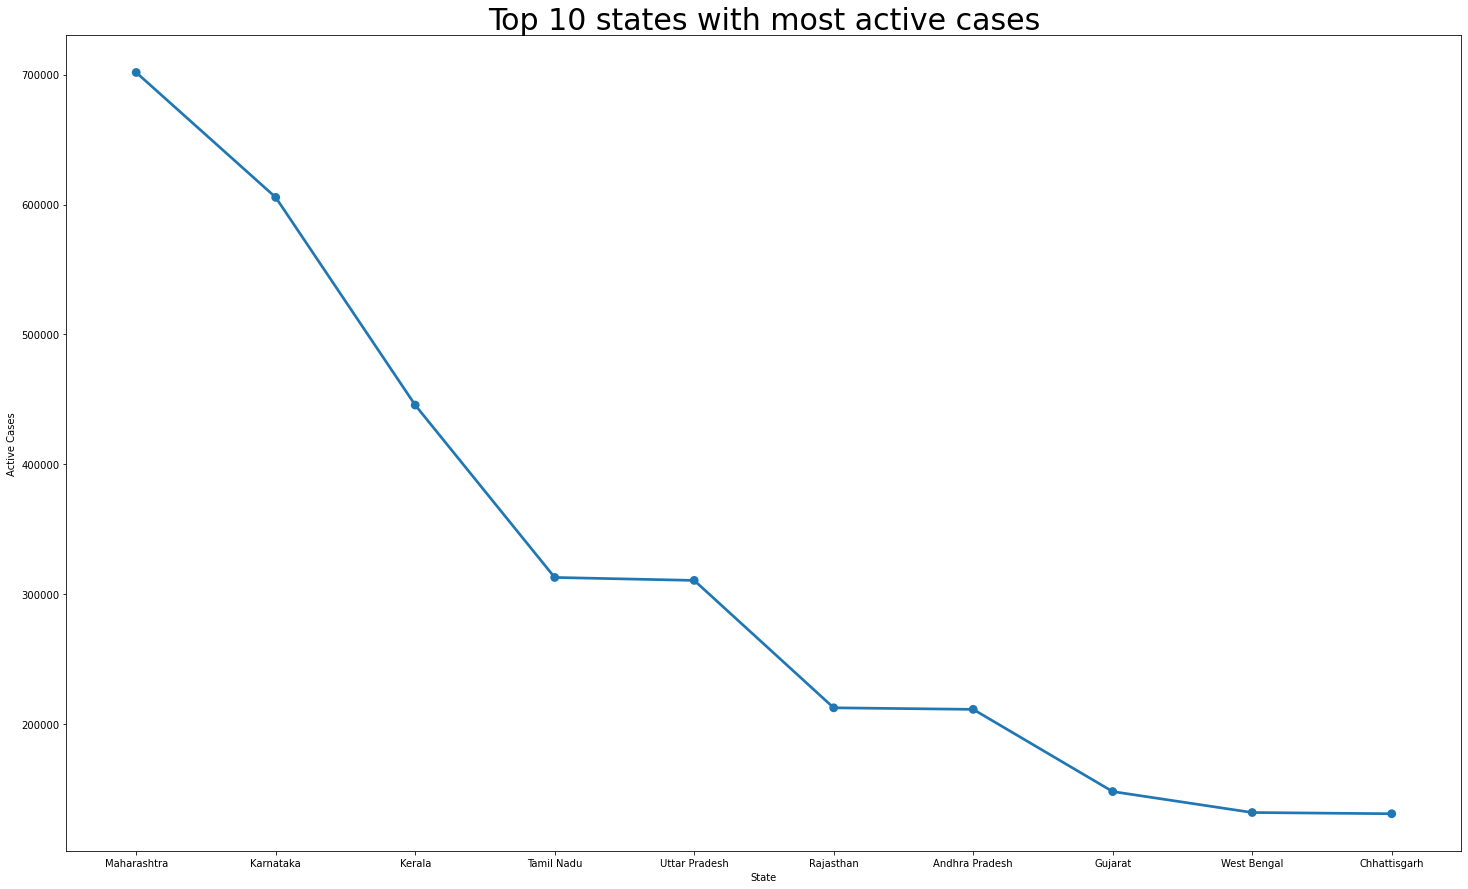

In [93]:
# pointplot
top_10_active_cases = df_covid.groupby(by = 'State/UnionTerritory').max()[['ActiveCases' , 'Date']].sort_values(by='ActiveCases',ascending = False).reset_index()
fig = plt.figure(figsize=(25,15))
plot =sns.pointplot(data = top_10_active_cases.iloc[:10], y='ActiveCases', x='State/UnionTerritory')
plt.title('Top 10 states with most active cases',size=30)
plt.xlabel('State')
plt.ylabel('Active Cases')

Text(0, 0.5, 'Active Cases')

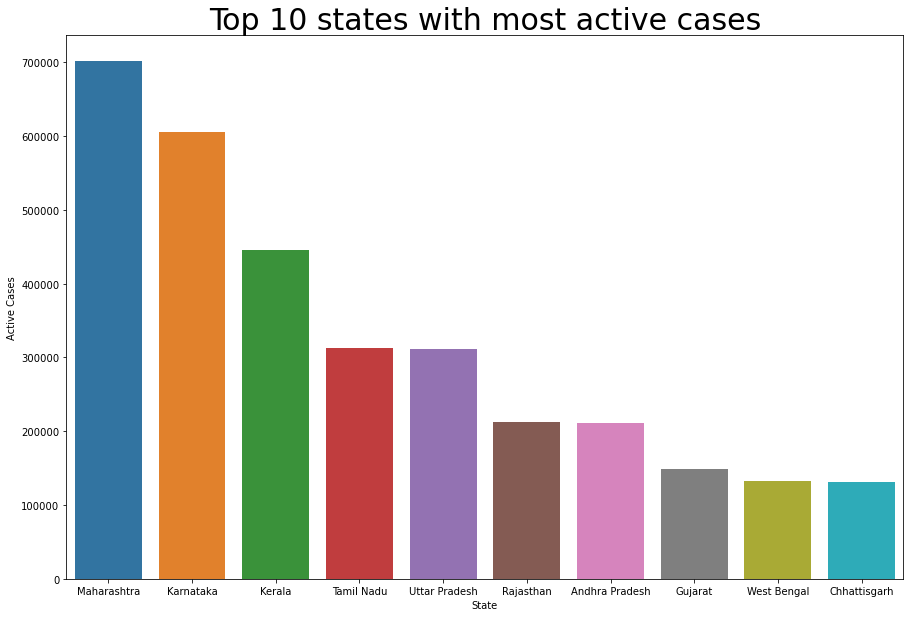

In [94]:
# barplot
top_10_active_cases = df_covid.groupby(by = 'State/UnionTerritory').max()[['ActiveCases' , 'Date']].sort_values(by='ActiveCases',ascending = False).reset_index()
fig = plt.figure(figsize=(15,10))
plot =sns.barplot(data = top_10_active_cases.iloc[:10], y='ActiveCases', x='State/UnionTerritory')
plt.title('Top 10 states with most active cases',size=30)
plt.xlabel('State')
plt.ylabel('Active Cases')

Text(0, 0.5, 'Deaths')

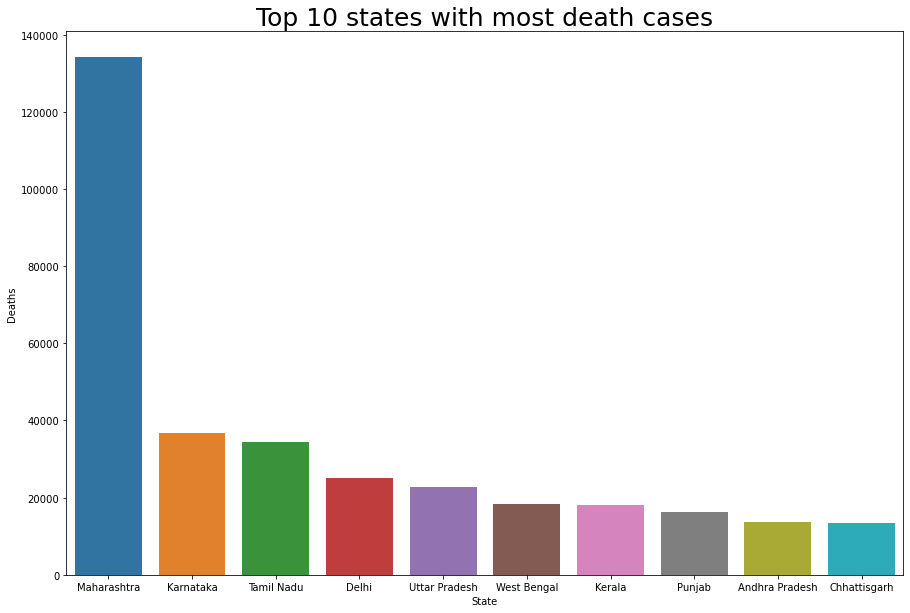

In [95]:
top_10_death_cases = df_covid.groupby(by = 'State/UnionTerritory').max()[['Deaths' , 'Date']].sort_values(by='Deaths',ascending = False).reset_index()
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(data = top_10_death_cases.iloc[:10], y='Deaths', x='State/UnionTerritory')
plt.title('Top 10 states with most death cases',size = 25)
plt.xlabel('State')
plt.ylabel('Deaths')

In [96]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'],format='%Y-%m-%d')

In [97]:
df_covid

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545


Text(0.5, 1.0, 'Top 5 Affected States in India')

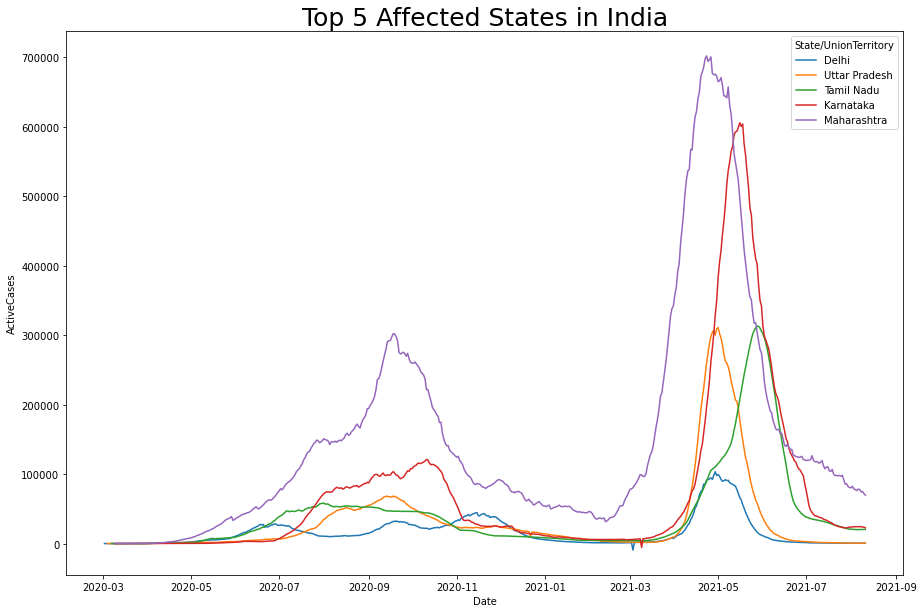

In [98]:
fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data = df_covid[df_covid['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Tamil Nadu','Uttar Pradesh','Delhi'])],x='Date',y='ActiveCases',hue = 'State/UnionTerritory')

ax.set_title("Top 5 Affected States in India",size = 25)

 Almost all states shares the same trend in Covid cases, as mentioned in the above chart

In [99]:
maharashtra = df_covid[df_covid['State/UnionTerritory'] == 'Maharashtra']

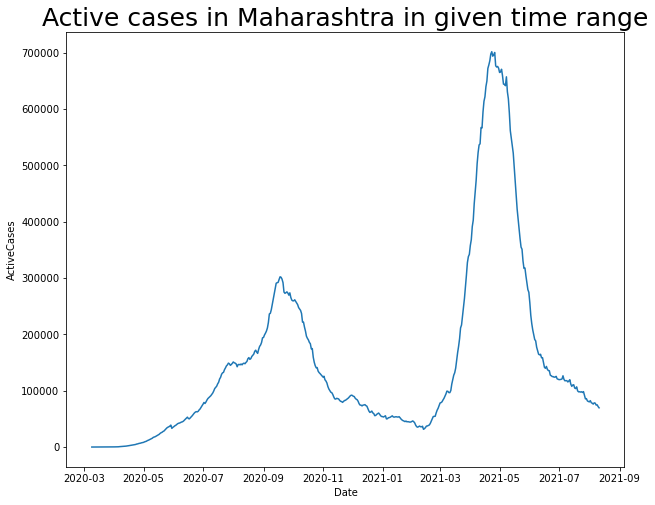

In [100]:
# Active cases in Maharashtra state along the time
plt.figure(figsize=(10,8))
sns.lineplot(x="Date",y="ActiveCases",data=maharashtra)
plt.title("Active cases in Maharashtra in given time range",size = 25)
plt.show()

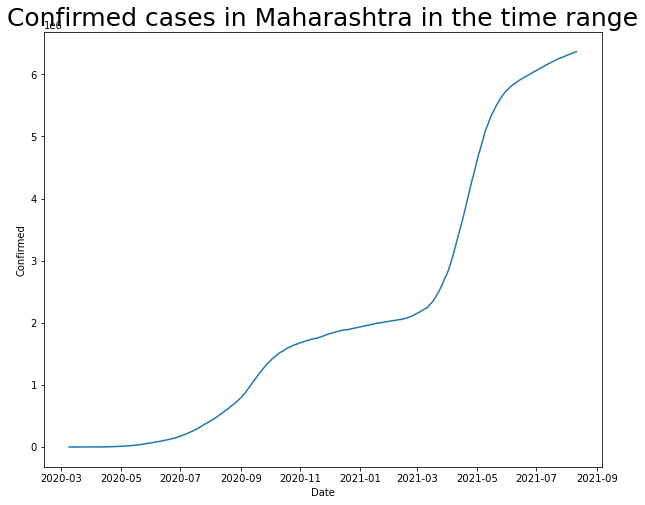

In [101]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Date",y="Confirmed",data=maharashtra)
plt.title("Confirmed cases in Maharashtra in the time range", size = 25)
plt.show()

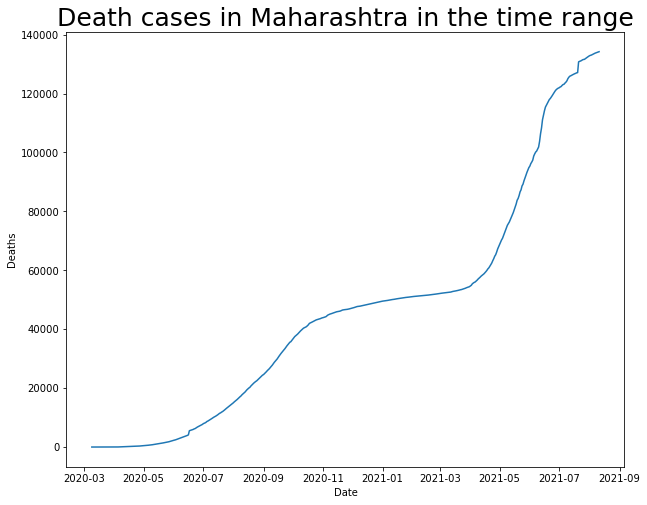

In [102]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Date",y="Deaths",data=maharashtra)
plt.title("Death cases in Maharashtra in the time range", size = 25)
plt.show()

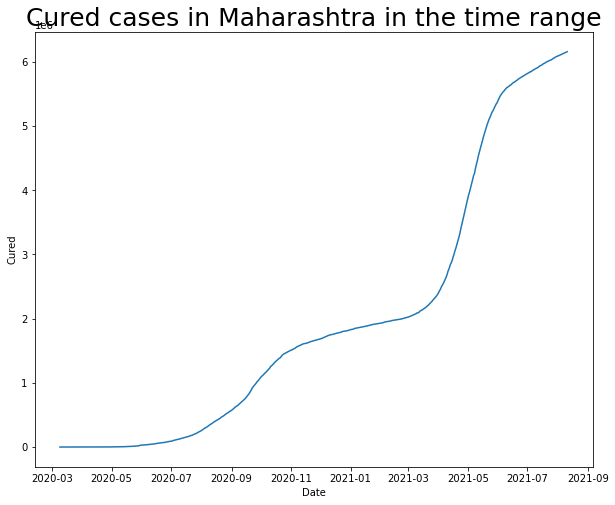

In [103]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Date",y="Cured",data=maharashtra)
plt.title("Cured cases in Maharashtra in the time range", size = 25)
plt.show()

Text(0.5, 1.0, 'Covid Info')

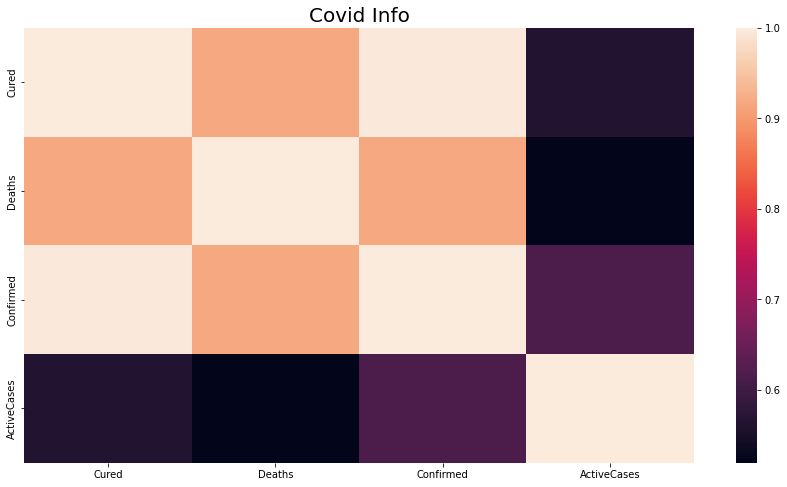

In [104]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df_covid.corr())
plt.title("Covid Info",size=20)

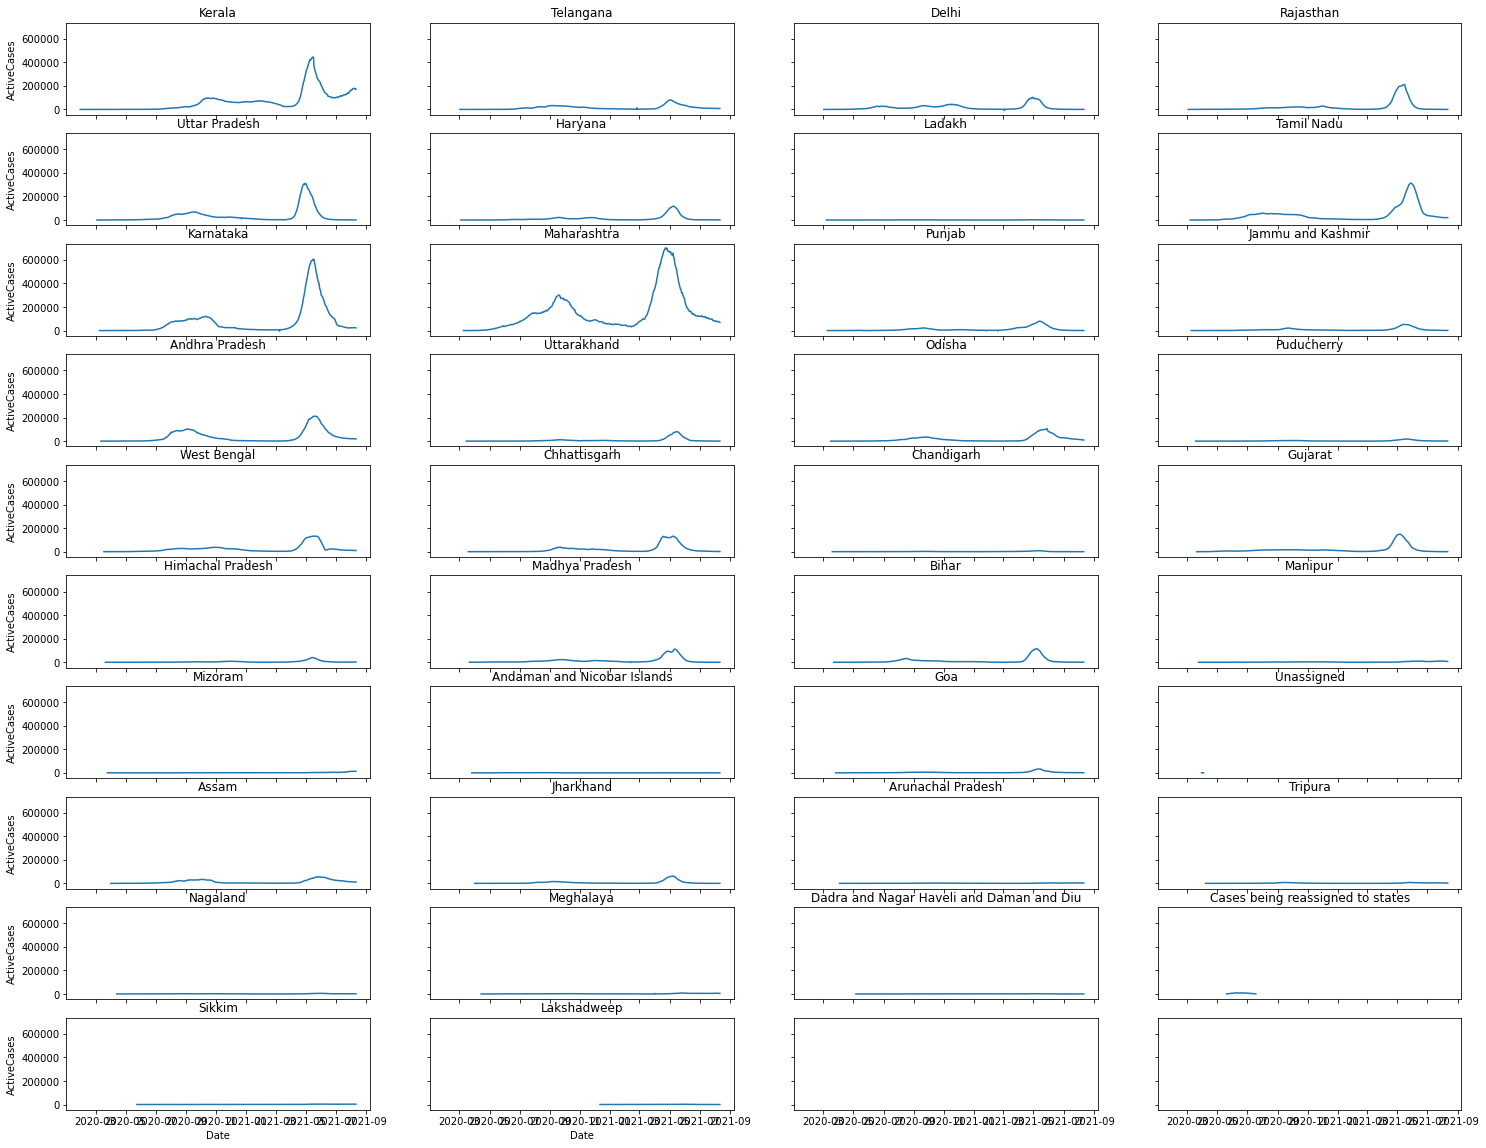

In [105]:
fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[25,20], sharex=True, sharey=True)
ax=ax.flatten()

for i,s in enumerate(df_covid['State/UnionTerritory'].unique()):
  data1=df_covid[df_covid['State/UnionTerritory']==s][['Date','ActiveCases']]
  sns.lineplot(data=data1, x='Date',y='ActiveCases', ax=ax[i])
  ax[i].set_title(s)


# Comparison of Active, Cured and Death cases of 3 states

In [106]:
df_covid.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'ActiveCases'],
      dtype='object')

<AxesSubplot:xlabel='Date', ylabel='Deaths'>

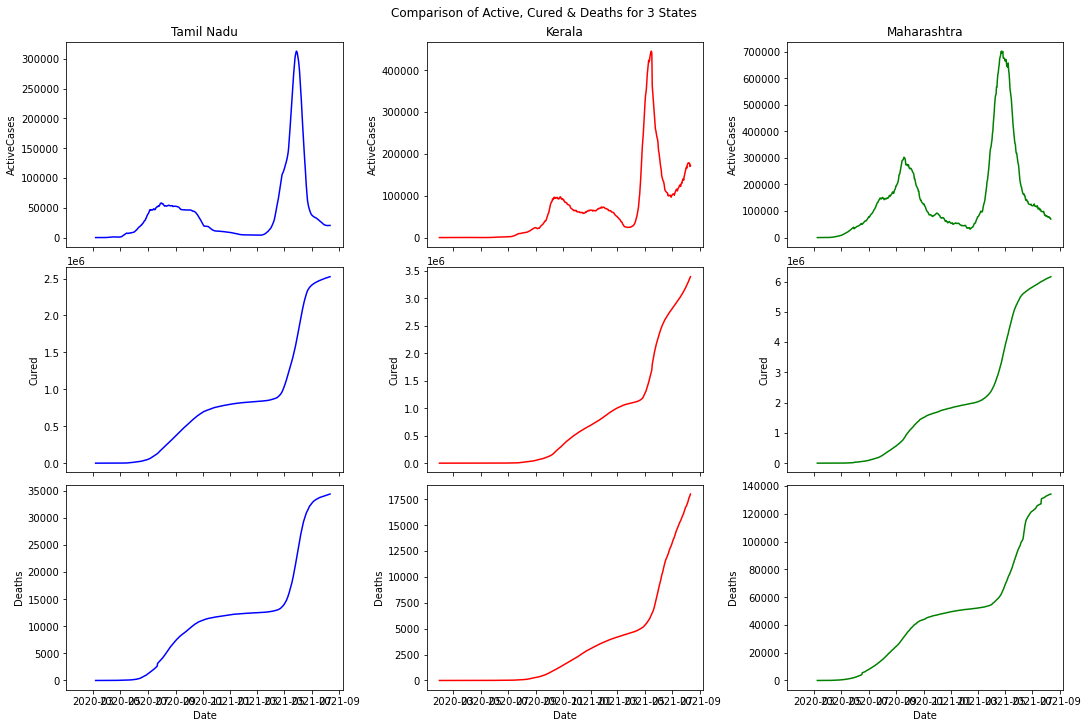

In [109]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df_covid[df_covid['State/UnionTerritory']=='Tamil Nadu']
kl=df_covid[df_covid['State/UnionTerritory']=='Kerala']
mh=df_covid[df_covid['State/UnionTerritory']=='Maharashtra']


fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")

sns.lineplot(data=tn, x='Date',y='ActiveCases', ax=ax[0,0], color='blue')
ax[0,0].set_title("Tamil Nadu")
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color='blue')
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color='blue')
    
sns.lineplot(data=kl, x='Date',y='ActiveCases', ax=ax[0,1], color='red')
ax[0,1].set_title("Kerala")
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color='red')
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color='red')

sns.lineplot(data=mh, x='Date',y='ActiveCases', ax=ax[0,2], color='green')
ax[0,2].set_title("Maharashtra")
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color='green')
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color='green')

# Distribution of Active, Cured & Death for 3 states

<AxesSubplot:xlabel='Deaths', ylabel='Density'>

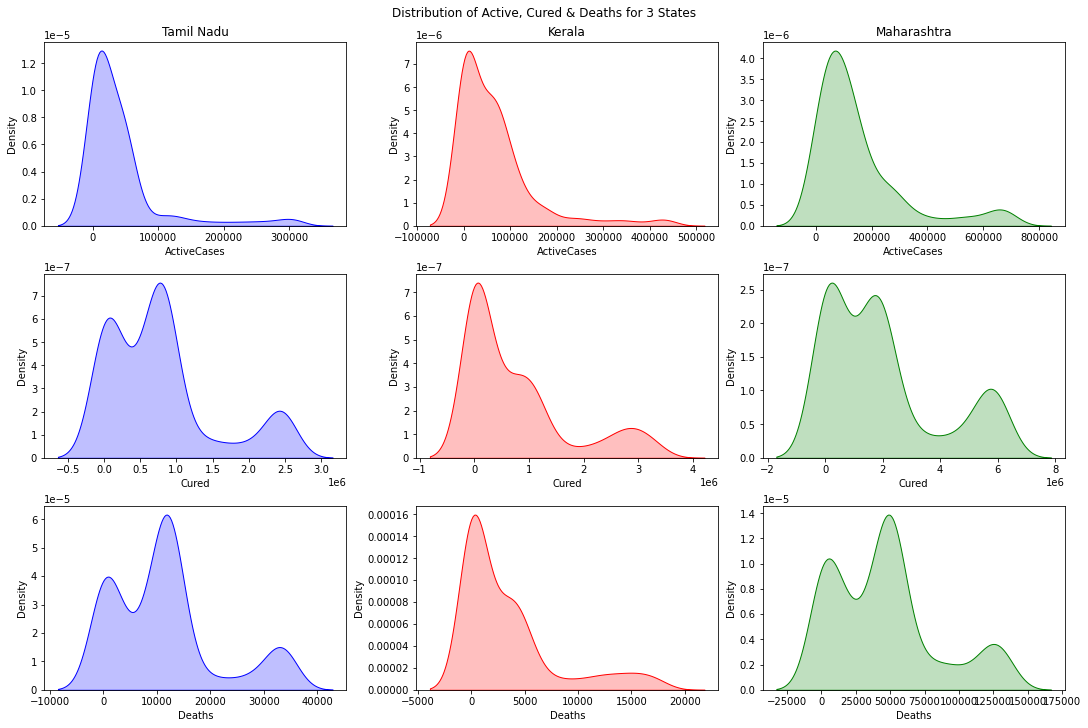

In [111]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df_covid[df_covid['State/UnionTerritory']=='Tamil Nadu']
kl=df_covid[df_covid['State/UnionTerritory']=='Kerala']
mh=df_covid[df_covid['State/UnionTerritory']=='Maharashtra']

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    
sns.kdeplot(data=tn['ActiveCases'],ax=ax[0,0],color='blue', fill=True)
ax[0,0].set_title("Tamil Nadu")
sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color='blue',fill=True)
sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color='blue',fill=True)

sns.kdeplot(data=kl['ActiveCases'], ax=ax[0,1], color='red',fill=True)
ax[0,1].set_title("Kerala")
sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color='red',fill=True)
sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color='red',fill=True)

sns.kdeplot(data=mh['ActiveCases'], ax=ax[0,2], color='green',fill=True)
ax[0,2].set_title("Maharashtra")
sns.kdeplot(data=mh['Cured'], ax=ax[1,2], color='green',fill=True)
sns.kdeplot(data=mh['Deaths'], ax=ax[2,2], color='green',fill=True)

# Load the covid_vaccine_statewise.csv data

In [78]:
df_vacc=pd.read_csv("covid_vaccine_statewise.csv")
df_vacc

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data processing and cleaning of covid_vaccine_statewise dataset

In [81]:
df_vacc['State'].unique(), df_vacc['State'].nunique()

(array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 37)

In [82]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [83]:
df_vacc.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


# Renaming the columns

In [85]:
df_vacc.rename(columns={'Updated On' : 'Vaccine_Date'}, inplace = True)
df_vacc.fillna(0)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df_vacc.fillna(0)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df_vacc.corr().fillna(0)

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
Total Doses Administered,1.000000,0.911988,0.671316,0.999592,0.993599,0.999555,0.999514,0.995388,0.995926,0.999912,...,0.997542,0.999402,0.996874,0.930244,0.995865,0.982666,0.998895,0.998607,0.984903,0.999428
Sessions,0.911988,1.000000,0.763954,0.918317,0.879641,0.918149,0.917061,0.907557,0.900257,0.913249,...,0.908047,0.923113,0.927887,0.888459,0.906845,0.912083,0.857913,0.855941,0.849045,0.926269
Sites,0.671316,0.763954,1.000000,0.681068,0.627350,0.853884,0.852989,0.841716,0.629698,0.675662,...,0.921580,0.934338,0.937431,0.679709,0.863773,0.915230,0.332935,0.352075,0.258501,0.764968
First Dose Administered,0.999592,0.918317,0.681068,1.000000,0.989969,0.999402,0.999038,0.994864,0.994820,0.999625,...,0.996494,0.999330,0.997537,0.929990,0.995693,0.984562,0.999652,0.999717,0.984698,0.999951
Second Dose Administered,0.993599,0.879641,0.627350,0.989969,1.000000,0.994449,0.995658,0.991743,0.992319,0.993033,...,0.996016,0.994107,0.988762,0.919781,0.984234,0.962381,0.975150,0.973441,0.965333,0.984929
Male (Doses Administered),0.999555,0.918149,0.853884,0.999402,0.994449,1.000000,0.999516,0.996267,0.997610,0.999483,...,0.997326,0.999301,0.996999,0.891904,0.982925,0.956962,0.000000,0.000000,0.000000,0.998267
Female (Doses Administered),0.999514,0.917061,0.852989,0.999038,0.995658,0.999516,1.000000,0.995508,0.997483,0.999433,...,0.997397,0.999365,0.996688,0.860993,0.987081,0.972485,0.000000,0.000000,0.000000,0.997674
Transgender (Doses Administered),0.995388,0.907557,0.841716,0.994864,0.991743,0.996267,0.995508,1.000000,0.993234,0.995268,...,0.997393,0.994326,0.989080,0.916682,0.927309,0.878477,0.000000,0.000000,0.000000,0.958150
Covaxin (Doses Administered),0.995926,0.900257,0.629698,0.994820,0.992319,0.997610,0.997483,0.993234,1.000000,0.994718,...,0.996170,0.998522,0.995486,0.958486,0.980285,0.954172,0.991343,0.986051,0.997218,0.989550
CoviShield (Doses Administered),0.999912,0.913249,0.675662,0.999625,0.993033,0.999483,0.999433,0.995268,0.994718,1.000000,...,0.997435,0.999376,0.996995,0.925565,0.996587,0.985017,0.998536,0.999008,0.981730,0.999431


# delete the state name "India"

In [89]:
df1=df_vacc[df_vacc.State != 'India'].fillna(0)
df1

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# sort values by 'Total Doses Administered'

In [90]:
df1.sort_values(by='Total Doses Administered',ascending=False)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
7414,09/08/2021,Uttar Pradesh,54447724.0,2621580.0,4845.0,45932488.0,8515236.0,30643444.0,23785865.0,18415.0,...,26583720.0,17007044.0,10856960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7413,08/08/2021,Uttar Pradesh,53608615.0,61648.0,128.0,45211718.0,8396897.0,30193702.0,23397014.0,17899.0,...,26020022.0,16821178.0,10767415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7412,07/08/2021,Uttar Pradesh,53589814.0,1443134.0,2646.0,45198365.0,8391449.0,30183590.0,23388335.0,17889.0,...,26006308.0,16817829.0,10765677.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7411,06/08/2021,Uttar Pradesh,53294582.0,1654065.0,3128.0,44973804.0,8320778.0,30017747.0,23259132.0,17703.0,...,25797914.0,16756942.0,10739726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7410,05/08/2021,Uttar Pradesh,52838552.0,2298766.0,4209.0,44597018.0,8241534.0,29773210.0,23047877.0,17465.0,...,25501103.0,16651664.0,10685785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,14/08/2021,Meghalaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5086,13/08/2021,Meghalaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5085,12/08/2021,Meghalaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5084,11/08/2021,Meghalaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# rename the column 'Total Individuals Vaccinated' as 'Total'

In [92]:
df1.rename(columns={'Total Individuals Vaccinated' : 'Total'},inplace = True)
df1.fillna(0)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# group the state and total cases

In [93]:
max_vacc = df1.groupby('State')['Total'].sum().to_frame()
max_vacc = max_vacc.sort_values('Total' , ascending = False)[:5]
max_vacc

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


In [96]:
# EDA & DATA VISUALIZATION on this covid_vaccine_statewise.csv dataset

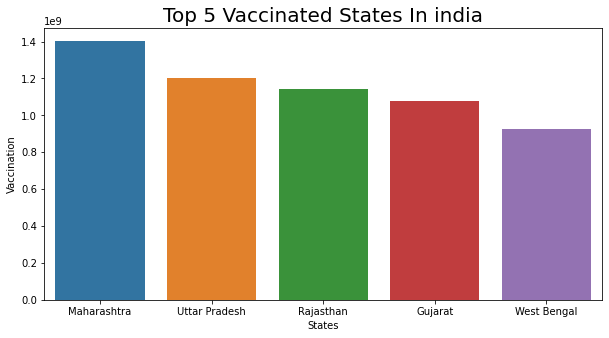

In [97]:
# barplot
fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated States In india",size = 20)
x = sns.barplot(data = max_vacc.iloc[:10],y = max_vacc.Total, x = max_vacc.index, linewidth = 1)
plt.xlabel('States')
plt.ylabel("Vaccination")
plt.show()

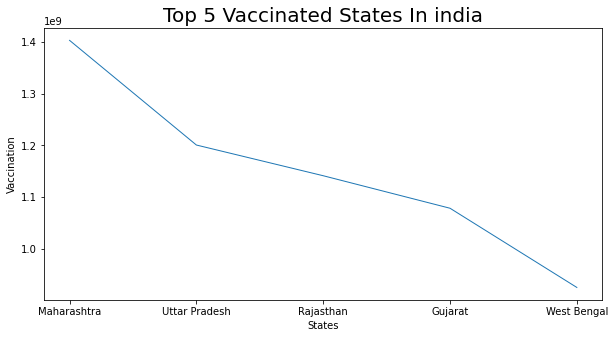

In [98]:
# lineplot
fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated States In india",size = 20)
x = sns.lineplot(data = max_vacc.iloc[:5],y = max_vacc.Total, x = max_vacc.index, linewidth = 1)
plt.xlabel('States')
plt.ylabel("Vaccination")
plt.show()